In [1]:
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler
import plotly.graph_objects as go

### read data

In [74]:
stocks = pd.read_csv("data/SPY_daily.csv")

In [75]:
sample = stocks.iloc[0:100]
fig = go.Figure(data=[go.Candlestick(x=sample['Date'],
                open=sample['Open'],
                high=sample['High'],
                low=sample['Low'],
                close=sample['Close'])],
               )

#fig.show()

### engineer features

In [84]:
#high_adj is high relative to the close
stocks['high_adj'] = (stocks['High'] - stocks['Close']) / stocks['Close']
#low_adj is low relative to the close
stocks['low_adj'] = (stocks['Low'] - stocks['Close']) / stocks['Close']
stocks['body'] = (stocks['Close'] - stocks['Open']) / stocks['Open']
stocks['close_prev'] = stocks['Close'].shift(1)

stocks = stocks.iloc[1:]
stocks['change'] = (stocks['Close'] - stocks['close_prev']) / stocks['close_prev']

stocks['range'] = (stocks['High'] - stocks['Low']) / stocks['Low']

/Users/alexdoria/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/alexdoria/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/alexdoria/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

In [89]:
stocks.head(3)

,Date,Open,High,Low,Close,Adj Close,Volume,high_adj,low_adj,body,close_prev,close_next,change,range,cluster,change_next
2,1993-02-02,44.21875,44.37500,44.12500,44.34375,26.698507,201300,0.000705,-0.004933,0.002827,44.25000,44.81250,0.002119,0.005666,0,-0.010593
3,1993-02-03,44.40625,44.84375,44.37500,44.81250,26.980742,529400,0.000697,-0.009763,0.009148,44.34375,45.00000,0.010571,0.010563,3,-0.004228
4,1993-02-04,44.96875,45.09375,44.46875,45.00000,27.093624,531500,0.002083,-0.011806,0.000695,44.81250,44.96875,0.004184,0.014055,3,0.000697


### explore features

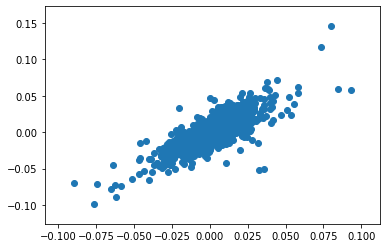

In [7]:
plt.scatter(stocks['body'], stocks['change'])

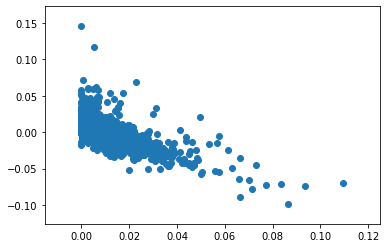

In [8]:
plt.scatter(stocks['high_adj'], stocks['change'])

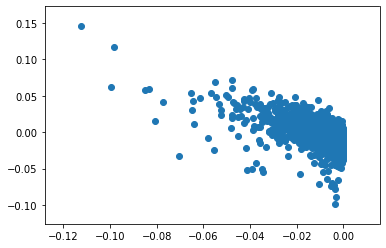

In [9]:
plt.scatter(stocks['low_adj'], stocks['change'])

(array([1.000e+00, 1.000e+00, 2.000e+00, 3.000e+00, 2.000e+00, 8.000e+00,
        1.600e+01, 1.900e+01, 8.400e+01, 2.350e+02, 5.800e+02, 1.775e+03,
        2.676e+03, 9.690e+02, 2.640e+02, 6.900e+01, 4.000e+01, 1.700e+01,
        8.000e+00, 6.000e+00, 2.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([-0.09844768, -0.09032617, -0.08220466, -0.07408314, -0.06596163,
        -0.05784012, -0.0497186 , -0.04159709, -0.03347558, -0.02535406,
        -0.01723255, -0.00911104, -0.00098952,  0.00713199,  0.0152535 ,
         0.02337502,  0.03149653,  0.03961804,  0.04773956,  0.05586107,
         0.06398258,  0.0721041 ,  0.08022561,  0.08834712,  0.09646864,
         0.10459015,  0.11271166,  0.12083318,  0.12895469,  0.1370762 ,
         0.14519772]),
 <a list of 30 Patch objects>)

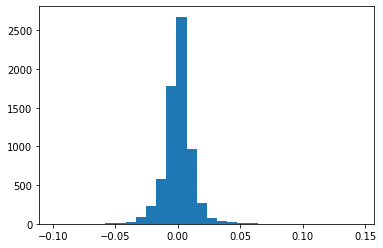

In [10]:
plt.hist(stocks['change'], bins=30)

### clustering

In [26]:
data = stocks[['high_adj', 'low_adj', 'body', 'change', 'range']]
data = data.to_numpy()
data = StandardScaler().fit_transform(data)

#labels = kmeans.labels_
#stocks['cluster'] = labels

### elbow method

In [34]:
n_clusters = 10
sse = []

for k in range(1, n_clusters):
    kmeans = KMeans(init='k-means++', n_clusters=k, n_init=16, random_state=1)
    kmeans.fit(data)
    sse.append(kmeans.inertia_)



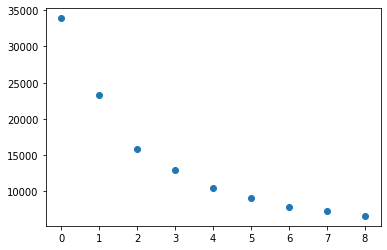

In [35]:
plt.scatter(np.arange(n_clusters-1), sse)

### picking k clusters

In [80]:
k = 5
kmeans = KMeans(init='k-means++', n_clusters=k, n_init=16, random_state=1)
kmeans.fit(data)
labels = kmeans.labels_
stocks['cluster'] = labels

### visualizing k clusters

(array([3973.,    0.,  137.,    0.,    0.,  149.,    0., 1332.,    0.,
        1188.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <a list of 10 Patch objects>)

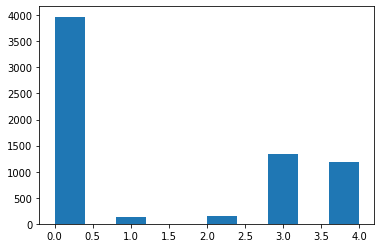

In [70]:
plt.hist(stocks['cluster'])

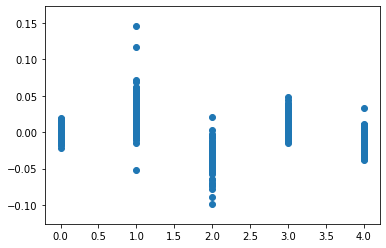

In [71]:
plt.scatter(stocks['cluster'], stocks['change'])

In [88]:
cluster_results = stocks.groupby('cluster')[['change', 'high_adj', 'low_adj', 'body', 'range']].mean()
cluster_results.head(k)

,change,high_adj,low_adj,body,range
cluster,,,,,
0,0.000647,0.003516,-0.004235,0.000208,0.007789
1,0.028686,0.004720,-0.038737,0.027239,0.045510
2,-0.031359,0.038181,-0.007120,-0.026139,0.045750
3,0.010673,0.002601,-0.013838,0.009144,0.016692
4,-0.011459,0.015006,-0.003471,-0.010661,0.018552


In [73]:
open = np.full((k, ), 100)
close = open + (cluster_results['change'] * open)
high = close + (cluster_results['high_adj'] * close)
low = close + (cluster_results['low_adj'] * close)

fig = go.Figure(data=[go.Candlestick(x=sample['Date'].iloc[1:k+1],
                open=open,
                high=high,
                low=low,
                close=close)])

fig.show()